In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [3]:
# Cargar el dataset
data = pd.read_csv('Titanic-Dataset.csv')

# 1. Análisis Exploratorio de Datos (EDA)
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

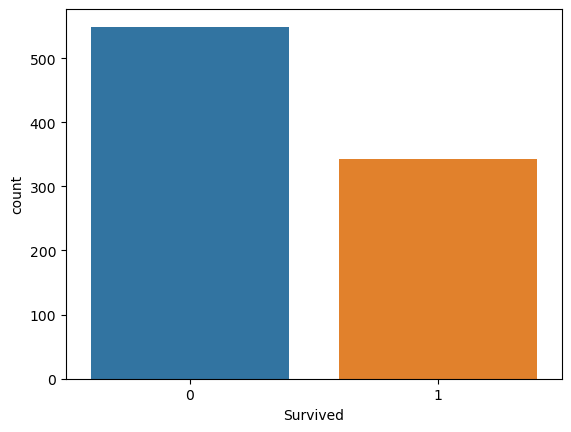

In [4]:
# Graficar la distribución de supervivientes
sns.countplot(data=data, x='Survived')
plt.show()

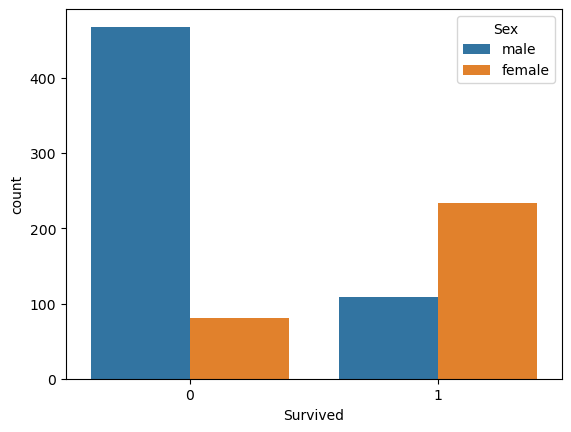

In [5]:
# Graficar la distribución de supervivientes por sexo
sns.countplot(data=data, x='Survived', hue='Sex')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

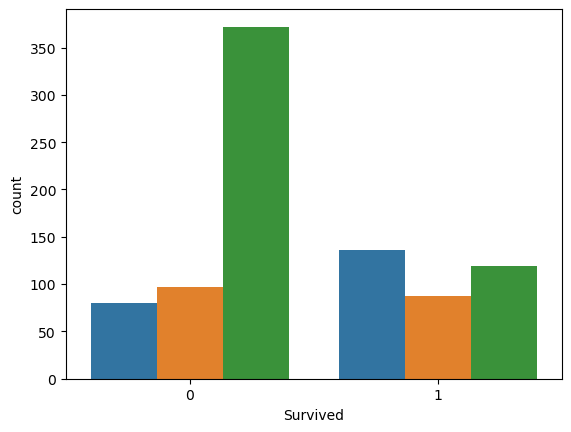

In [6]:
# Graficar la distribución de supervivientes por clase
sns.countplot(data=data, x='Survived', hue='Pclass')
plt.show()

In [7]:
# 2. Preprocesamiento de Datos
# Tratar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [8]:
# Convertir características categóricas a numéricas
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Eliminar columnas innecesarias
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [9]:
# 3. Selección de características
X = data.drop('Survived', axis=1)
y = data['Survived']

# 4. División del dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
# 6. Evaluar el desempeño del modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


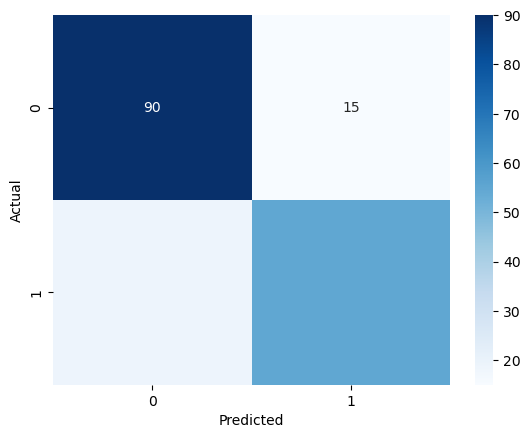

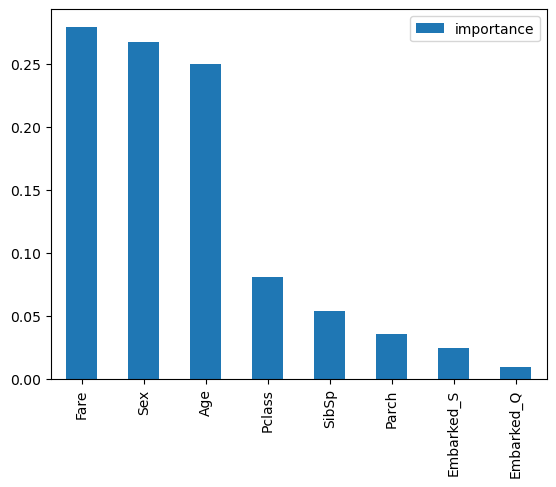

In [12]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Visualización de Resultados
# Importancia de características
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances.plot(kind='bar')
plt.show()
